In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df= pd.read_csv('C:/Users/AMOL/Downloads/archive (3)/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [7]:
# Chi-Square Test for Categorical Features: To determine 
# if there is a significant association between categorical
# features (e.g., Gender, Geography) and the churn status.
from scipy.stats import chi2_contingency

# Cross-tabulation of Gender and Churn
contingency_table = pd.crosstab(df['Gender'], df['Exited'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square Test: p-value = {p}")

print('A low p-value (< 0.05) suggests that there is a significant relationship between gender and churn.')

Chi-square Test: p-value = 2.2482100097131755e-26
A low p-value (< 0.05) suggests that there is a significant relationship between gender and churn.


In [9]:
# Cross-tabulation of Geography and Churn
contingency_table = pd.crosstab(df['Geography'], df['Exited'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square Test: p-value = {p}")

print('A low p-value (< 0.05) suggests that there is a significant relationship between Geography and churn.')

Chi-square Test: p-value = 3.8303176053541544e-66
A low p-value (< 0.05) suggests that there is a significant relationship between Geography and churn.


In [10]:
# T-Test for Numerical Features: Use a t-test to compare the means of numerical 
# features like Credit Score, Age, and Balance between churned and non-churned customers.
from scipy.stats import ttest_ind

# Test between customers who churned and those who didn’t
churned = df[df['Exited'] == 1]
not_churned = df[df['Exited'] == 0]

# T-test for Credit Score
t_stat, p_value = ttest_ind(churned['CreditScore'], not_churned['CreditScore'])

print(f"T-Test for Credit Score: p-value = {p_value}")
print('A low p-value (< 0.05) indicates that there is a significant ')
print('difference in credit scores between churned and non-churned customers.')     

T-Test for Credit Score: p-value = 0.006738213892192373
A low p-value (< 0.05) indicates that there is a significant 
difference in credit scores between churned and non-churned customers.


In [13]:
# T-test for Age 
t_stat, p_value = ttest_ind(churned['Age'], not_churned['Age'])

print(f"T-Test for Credit Score: p-value = {p_value}")
print('A low p-value (< 0.05) indicates that there is a significant ')
print('difference in Age between churned and non-churned customers.')     

T-Test for Credit Score: p-value = 1.2399313093427738e-186
A low p-value (< 0.05) indicates that there is a significant 
difference in Age between churned and non-churned customers.


In [14]:
# T-test for Balance 
t_stat, p_value = ttest_ind(churned['Balance'], not_churned['Balance'])

print(f"T-Test for Credit Score: p-value = {p_value}")
print('A low p-value (< 0.05) indicates that there is a significant ')
print('difference in Balance between churned and non-churned customers.')     

T-Test for Credit Score: p-value = 1.2755633191525477e-32
A low p-value (< 0.05) indicates that there is a significant 
difference in Balance between churned and non-churned customers.


In [226]:
# Encode 'Exited' for clearer labeling (0=Stayed, 1=Churned)
df['Exited_new'] = df['Exited'].replace({0: 'Stayed', 1: 'Churned'})

In [227]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_new
7984,7985,15678206,Yeh,464,France,Male,46,6,161798.53,1,1,0,182944.47,0,Stayed
5201,5202,15625675,Clements,569,France,Male,36,1,67087.69,1,1,0,154775.70,0,Stayed
1638,1639,15571550,Dore,699,France,Male,39,9,0.00,1,1,0,80963.92,0,Stayed
2693,2694,15627697,Alekseyeva,662,France,Male,34,2,0.00,2,0,1,21497.27,0,Stayed
275,276,15758685,Dubinina,706,Spain,Female,37,7,0.00,2,1,1,110899.30,0,Stayed


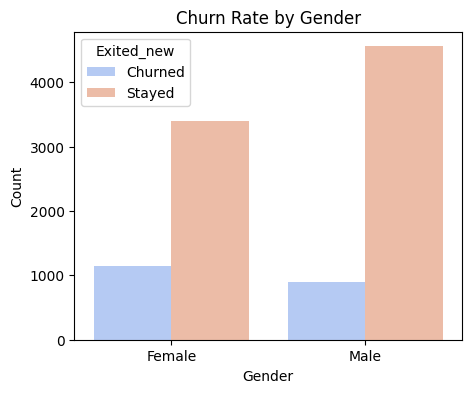

Exited_new  Churned  Stayed    All
Gender                            
Female         1139    3404   4543
Male            898    4559   5457
All            2037    7963  10000


In [228]:
# Create a bar chart showing churn rate by Gender
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', hue='Exited_new', data=df, palette='coolwarm')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

gender_crosstab = pd.crosstab(df['Gender'], df['Exited_new'], margins=True)
print(gender_crosstab)


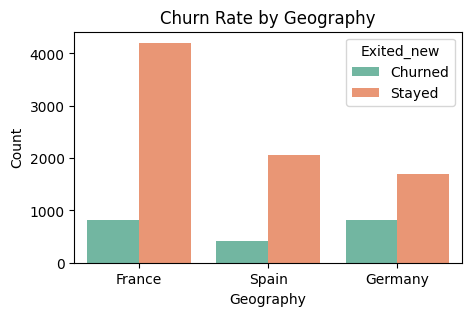

Exited_new  Churned  Stayed    All
Geography                         
France          810    4204   5014
Germany         814    1695   2509
Spain           413    2064   2477
All            2037    7963  10000


In [229]:
# Create a bar chart showing churn rate by Geography
plt.figure(figsize=(5,3))
sns.countplot(x='Geography', hue='Exited_new', data=df, palette='Set2')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

geography_crosstab = pd.crosstab(df['Geography'], df['Exited_new'], margins=True)
print(geography_crosstab)


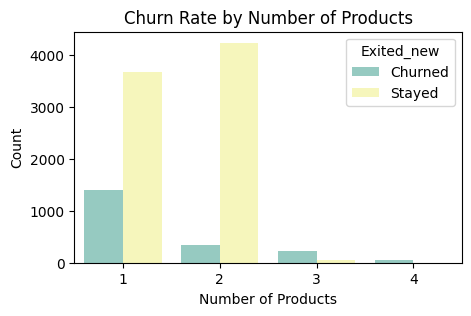

Exited_new     Churned  Stayed    All
NumOfProducts                        
1                 1409    3675   5084
2                  348    4242   4590
3                  220      46    266
4                   60       0     60
All               2037    7963  10000


In [230]:
# Create a bar chart showing churn rate by number of products held by the customer
plt.figure(figsize=(5,3))
sns.countplot(x='NumOfProducts', hue='Exited_new', data=df, palette='Set3')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

products_crosstab = pd.crosstab(df['NumOfProducts'], df['Exited_new'], margins=True)
print(products_crosstab)


C:\Users\AMOL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\AMOL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


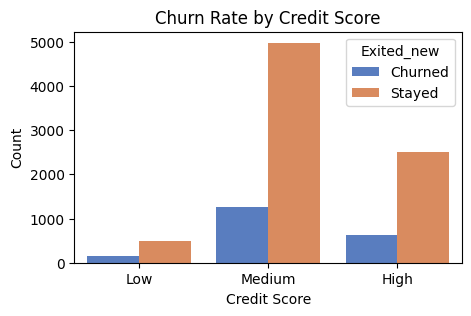

Exited_new       Churned  Stayed    All
CreditScore_Bin                        
Low                  152     491    643
Medium              1266    4975   6241
High                 619    2497   3116
All                 2037    7963  10000


In [231]:
# Create a new column for CreditScore bins
df['CreditScore_Bin'] = pd.cut(df['CreditScore'], bins=[300,500,700,900], labels=['Low', 'Medium', 'High'])

# Create a bar chart showing churn rate by Credit Score bins
plt.figure(figsize=(5,3))
sns.countplot(x='CreditScore_Bin', hue='Exited_new', data=df, palette='muted')
plt.title('Churn Rate by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

credit_crosstab = pd.crosstab(df['CreditScore_Bin'], df['Exited_new'], margins=True)
print(credit_crosstab)

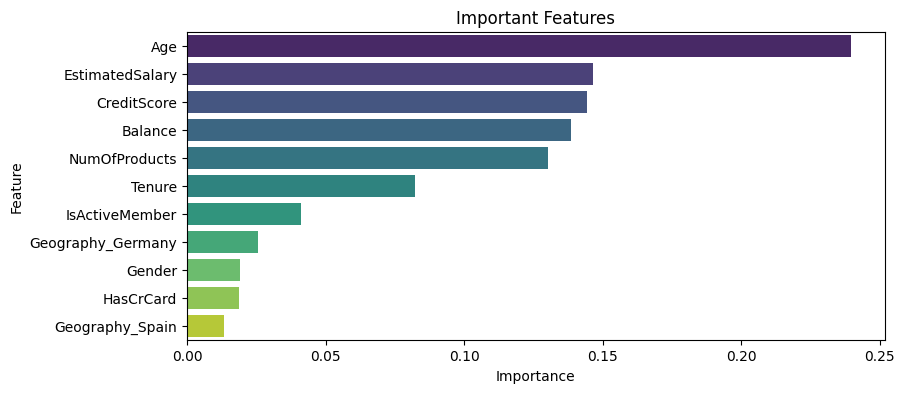

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'imp' contains feature importances and 'names' contains feature names
feature_importance_df = pd.DataFrame({'Feature': names, 'Importance': imp[indices]})

# Plot the Seaborn barplot
plt.figure(figsize=(9, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Important Features")
plt.show()


In [233]:
lb= LabelEncoder()
df['Gender']= lb.fit_transform(df['Gender'])

In [234]:
df= pd.get_dummies(df,columns=['Geography'], drop_first=True)

In [235]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_new,CreditScore_Bin,Geography_Germany,Geography_Spain
6698,6699,15784491,Ho,725,0,31,6,0.00,1,0,0,61326.43,0,Stayed,High,False,False
104,105,15804919,Dunbabin,670,0,65,1,0.00,1,1,1,177655.68,1,Churned,Medium,False,True
4552,4553,15655648,Bock,610,0,25,2,0.00,2,1,0,123723.83,0,Stayed,Medium,False,False
8268,8269,15712608,Costa,787,0,42,2,74483.97,2,0,1,44273.91,0,Stayed,High,True,False
7493,7494,15683276,Sargood,610,0,37,10,140363.95,2,1,1,129563.86,0,Stayed,Medium,False,True


In [236]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Exited_new', 'CreditScore_Bin',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [253]:
features=['CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary','Geography_Germany', 'Geography_Spain']

In [254]:
x=df[features]
y=df['Exited']

In [255]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.2)

In [256]:
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

In [257]:
x_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.36766974,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ...,  1.6612541 ,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.25280688,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ..., -0.1427649 ,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ..., -0.05082558,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.81456811,
         1.72572313, -0.57638802]])

In [258]:
x_test

array([[-5.12501721e-01,  9.09111664e-01, -6.77299309e-01, ...,
        -9.90969462e-01,  1.73668197e+00, -5.63491843e-01],
       [-2.36046598e-01,  9.09111664e-01,  3.84298354e-01, ...,
         8.29379298e-01, -5.75810666e-01, -5.63491843e-01],
       [-4.61306328e-01, -1.09997489e+00,  4.80807232e-01, ...,
        -6.99045482e-01, -5.75810666e-01,  1.77464858e+00],
       ...,
       [ 8.59534812e-01, -1.09997489e+00,  7.70333868e-01, ...,
        -1.13742992e+00, -5.75810666e-01, -5.63491843e-01],
       [ 4.70449825e-01,  9.09111664e-01, -9.66825944e-01, ...,
        -3.82376884e-01, -5.75810666e-01, -5.63491843e-01],
       [-1.84851205e-01,  9.09111664e-01, -1.73715981e-03, ...,
         1.55739636e-01,  1.73668197e+00, -5.63491843e-01]])

In [259]:
from sklearn.linear_model import LogisticRegression 

logreg= LogisticRegression()

logreg.fit(x_train,y_train)

y_pred_log_reg= logreg.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Logistic Regression Model')
print(confusion_matrix(y_pred_log_reg, y_test))
print(classification_report(y_pred_log_reg, y_test))
print(accuracy_score(y_pred_log_reg, y_test))

Logistic Regression Model
[[1541  313]
 [  66   80]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1854
           1       0.20      0.55      0.30       146

    accuracy                           0.81      2000
   macro avg       0.58      0.69      0.59      2000
weighted avg       0.90      0.81      0.85      2000

0.8105


In [260]:
from sklearn.naive_bayes import GaussianNB

NB= GaussianNB()

NB.fit(x_train,y_train)

y_pred= NB.predict(x_test)

confusion_matrix= confusion_matrix(y_test,y_pred)

classification_report= classification_report(y_test,y_pred)

accuracy_score= accuracy_score(y_test,y_pred)

print('Gaussian NB Model')
print(confusion_matrix)
print(classification_report)
print(accuracy_score)

Gaussian NB Model
[[1525   82]
 [ 253  140]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.63      0.36      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000

0.8325


In [263]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)  # Choose the number of neighbors (K)

knn.fit(x_train, y_train)  # Train the model

y_pred_knn = knn.predict(x_test)  # Make predictions

print('KNN Model')
print(confusion_matrix(y_pred_knn, y_test))
print(classification_report(y_pred_knn, y_test))
print(accuracy_score(y_pred_knn, y_test))


KNN Model
[[1498  223]
 [ 109  170]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1721
           1       0.43      0.61      0.51       279

    accuracy                           0.83      2000
   macro avg       0.68      0.74      0.70      2000
weighted avg       0.86      0.83      0.85      2000

0.834


In [264]:
from sklearn.svm import SVC

svc = SVC()  
svc.fit(x_train, y_train)  

y_pred_svc = svc.predict(x_test) 

print('SVM Model')
print(confusion_matrix(y_pred_svc, y_test))
print(classification_report(y_pred_svc, y_test))
print(accuracy_score(y_pred_svc, y_test))

SVM Model
[[1563  243]
 [  44  150]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1806
           1       0.38      0.77      0.51       194

    accuracy                           0.86      2000
   macro avg       0.68      0.82      0.71      2000
weighted avg       0.92      0.86      0.88      2000

0.8565


In [265]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=100,random_state=42)

model.fit(x_train,y_train)

y_pred= model.predict(x_test)

confusionmatrix= confusion_matrix(y_test,y_pred)

classificationreport= classification_report(y_test,y_pred)

accuracyscore= accuracy_score(y_test,y_pred)

print('Random Forest Model')
print(confusionmatrix)
print(classificationreport)
print(accuracyscore)

Random Forest Model
[[1554   53]
 [ 209  184]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000

0.869


## Recommendations
- **Best Model**: **Support Vector Machine (SVM)**
  - **Why?**: SVM has the highest accuracy (86%) and a strong F1-Score for churned predictions (1). It strikes a good balance between precision and recall, making it a reliable model for this dataset.
  
- **Consider Random Forest**: If interpretability is essential, Random Forest can provide insights into feature importance while offering a good accuracy rate (87%).
  
- **Use KNN**: KNN may be a suitable alternative since it has a better balance for churn (1) than Logistic Regression and Gaussian Naive Bayes.
